In [1]:
from keras.datasets import cifar10
import numpy as np
import pandas as pd
from keras.utils import np_utils
import matplotlib.pyplot as plt
from  keras.models import Sequential
from  keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,ZeroPadding2D
import pandas as pd
np.random.seed(10)

Using TensorFlow backend.
/home/e530toadwei/.conda/envs/tensorflow_gpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
print("train set:",len(x_train))
print("test set:",len(x_test))

train set: 50000
test set: 10000


In [4]:
label_dict={0:"airplane",1:"automobile",2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [5]:
y_train[1]

array([9], dtype=uint8)

In [6]:
def plot_img_label_prediction(img,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25 : num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(img[idx],cmap="binary")
        title=str(i)+"  :  "+label_dict[labels[idx][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[idx]]
        idx+=1
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
    

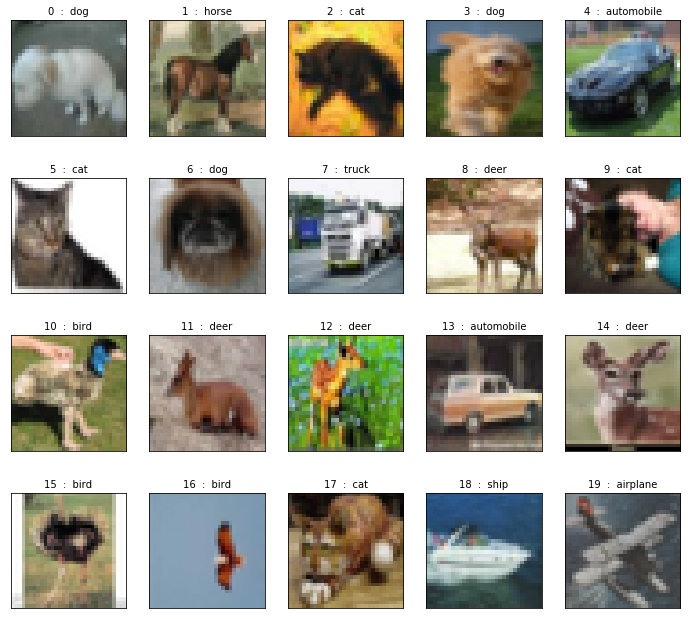

In [7]:
plot_img_label_prediction(x_train,y_train,[],idx=993,num=20)

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_test_=x_test/255
x_train_=x_train/255

In [10]:
y_train[1][0]

9

In [11]:
y_train_=np_utils.to_categorical(y_train,10)
y_test_=np_utils.to_categorical(y_test,10)

In [12]:
y_train[993]

array([5], dtype=uint8)

In [13]:
model=Sequential()

In [14]:
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(32,32,3),activation="relu",padding="same"))

In [15]:
model.add(Dropout(rate=0.5))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding="same"))

In [18]:
model.add(Dropout(rate=0.5))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Conv2D(filters=64,kernel_size=(2,2),activation="relu",padding='same'))

In [21]:
model.add(Dropout(0.5))

In [22]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
model.add(Flatten())

In [24]:
model.add(Dropout(0.5))

In [25]:
model.add(Dense(2500,activation='relu'))

In [26]:
model.add(Dropout(0.5))

In [27]:
model.add(Dense(1024,activation='relu'))

In [28]:
model.add(Dropout(0.5))

In [29]:
model.add(Dense(10,activation='softmax'))

In [30]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        3136      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          32832     
__________

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
result=model.fit(x_train_,y_train_,validation_split=0.5,epochs=100,batch_size=128,verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/100
25000/25000 [==============================] - 5s 209us/step - loss: 1.9205 - acc: 0.2834 - val_loss: 2.0252 - val_acc: 0.3248
Epoch 2/100
25000/25000 [==============================] - 4s 178us/step - loss: 1.6224 - acc: 0.3981 - val_loss: 1.9133 - val_acc: 0.3219
Epoch 3/100
25000/25000 [==============================] - 5s 181us/step - loss: 1.5081 - acc: 0.4445 - val_loss: 1.6893 - val_acc: 0.4053
Epoch 4/100
25000/25000 [==============================] - 5s 184us/step - loss: 1.4407 - acc: 0.4743 - val_loss: 1.7559 - val_acc: 0.3553
Epoch 5/100
25000/25000 [==============================] - 4s 175us/step - loss: 1.4020 - acc: 0.4893 - val_loss: 1.7555 - val_acc: 0.3759
Epoch 6/100
25000/25000 [==============================] - 4s 177us/step - loss: 1.3522 - acc: 0.5096 - val_loss: 1.5470 - val_acc: 0.4721
Epoch 7/100
25000/25000 [==============================] - 4s 178us/step - loss: 1.3129 - acc: 0.5239 - val_loss: 1.

25000/25000 [==============================] - 5s 211us/step - loss: 0.8249 - acc: 0.7094 - val_loss: 1.4745 - val_acc: 0.4814
Epoch 60/100
25000/25000 [==============================] - 5s 183us/step - loss: 0.8364 - acc: 0.7064 - val_loss: 1.2880 - val_acc: 0.5722
Epoch 61/100
25000/25000 [==============================] - 5s 187us/step - loss: 0.8204 - acc: 0.7118 - val_loss: 1.3503 - val_acc: 0.5555
Epoch 62/100
25000/25000 [==============================] - 5s 194us/step - loss: 0.8395 - acc: 0.7046 - val_loss: 1.3600 - val_acc: 0.5417
Epoch 63/100
25000/25000 [==============================] - 5s 197us/step - loss: 0.8264 - acc: 0.7073 - val_loss: 1.2700 - val_acc: 0.5906
Epoch 64/100
25000/25000 [==============================] - 5s 197us/step - loss: 0.8190 - acc: 0.7084 - val_loss: 1.1872 - val_acc: 0.6217
Epoch 65/100
25000/25000 [==============================] - 5s 199us/step - loss: 0.8219 - acc: 0.7090 - val_loss: 1.5525 - val_acc: 0.4610
Epoch 66/100
25000/25000 [=======

In [33]:
scores=model.evaluate(x_test_,y_test_,verbose=1)
scores[1]

10000/10000 [==============================] - 1s 80us/step


0.56779999999999997

In [34]:
predict=model.predict_classes(x_test)

10000/10000 [==============================] - 1s 65us/step


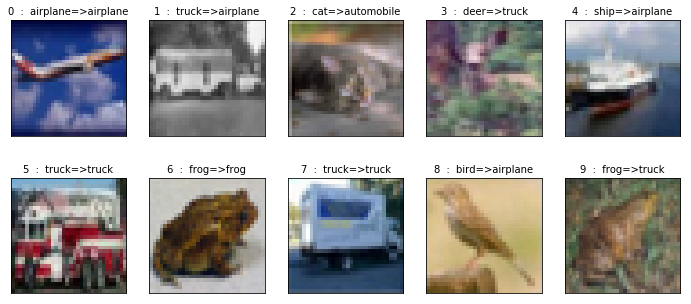

In [35]:
plot_img_label_prediction(x_test,y_test,predict,584,10)

In [36]:
predicted_probability=model.predict(x_test_)

In [37]:
def show_predice(y,predict,x,predicted_probability,i):
    print('label : ',label_dict[y[i][0]]),"predict : ",label_dict[predict[i]]
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(predicted_probability[i][j]))

label :  ship


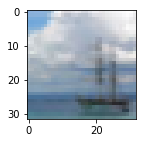

airplane Probability:0.066793144
automobile Probability:0.014246552
bird Probability:0.039570987
cat Probability:0.123235270
deer Probability:0.078032374
dog Probability:0.057098970
frog Probability:0.039773483
horse Probability:0.059778757
ship Probability:0.479003757
truck Probability:0.042466681


In [38]:
show_predice(y_test,predict,x_test,predicted_probability,166)

In [39]:
predict.shape

(10000,)

In [40]:
pd.crosstab(y_test.reshape(-1),predict,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,847,42,17,2,1,2,1,5,10,73
1,55,788,0,0,0,1,1,1,11,143
2,351,127,217,5,5,112,18,31,8,126
3,218,145,31,58,2,246,26,25,32,217
4,312,265,19,11,34,77,18,57,4,203
5,146,123,19,27,1,475,12,39,20,138
6,113,219,11,5,0,60,260,8,23,301
7,142,88,10,7,12,66,6,431,6,232
8,462,67,2,0,2,0,0,2,347,118


In [41]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

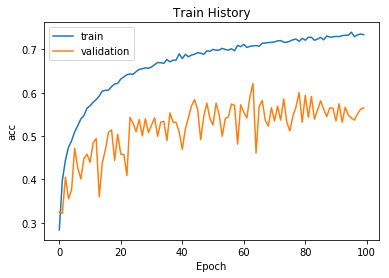

In [42]:
show_train_history(result,'acc','val_acc')

In [46]:
model.save_weights("savemodel/cifarCNNModel.h5")